In [1]:
from google.colab import drive
drive.mount('/content/grdive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/grdive


In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

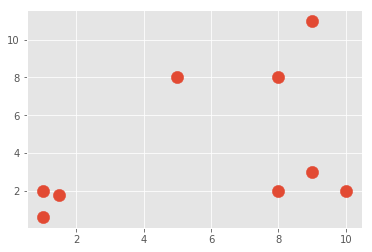

In [3]:
X=np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11],[8,2],[10,2],[9,3],])
plt.scatter(X[:,0],X[:,1],s=150)
plt.show()
colors=10*["g","r","c","b","k"]

In [0]:
class Mean_Shift:
  def __init__(self, radius=4):
    self.radius=radius
  
  def fit(self,data):
    centroids={}
    
    for i in range(len(data)):
      centroids[i]=data[i]
      
    while True:
      new_centroids=[]
      for i in centroids:
        in_bandwidth =[]
        centroid = centroids[i]
        for featureset in data:
          if np.linalg.norm(featureset-centroid)<self.radius:
            in_bandwidth.append(featureset)
            
        new_centroid=np.average(in_bandwidth, axis=0)
        new_centroids.append(tuple(new_centroid))
      
      uniques=sorted(list(set(new_centroids)))
      
      prev_centroids=dict(centroids)
      centroids={}
      
      for i in range(len(uniques)):
        centroids[i]=np.array(uniques[i])
      
      optimized=True
      
      for i in centroids:
        if not np.array_equal(centroids[i], prev_centroids[i]):
          optimized=False
        if not optimized:
          break    #there is no point in comparing previous and new centroids so can be broken
          
      if optimized:
        break   #breaks out of the while loop ie algorithm is completed
        
   
    self.centroids=centroids 

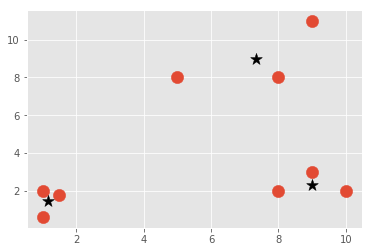

In [7]:
clf=Mean_Shift()
clf.fit(X)
centroids=clf.centroids
plt.scatter(X[:,0],X[:,1],s=150)

for c in centroids:
  plt.scatter(centroids[c][0], centroids[c][1], color="k",marker="*",s=150)
plt.show()

In [0]:
'''
#Dynamic radius / bandwidth
class Mean_Shift:
  def __init__(self, radius=None, radius_norm_step=100):
    self.radius=radius
    self.radius_norm_step=radius_norm_step
    
  
  def fit(self,data):
    
    if self.radius==None:
      all_data_centroid = np.average(data, axis=0)
      all_data_norm= np.linalg.norm(all_data_centroid)
      self.radius= all_data_norm/self.radius_norm_step
    
    
    for i in range(len(data)):
      centroids[i]=data[i]
      
    while True:
      new_centroids=[]
      for i in centroids:
        in_bandwidth =[]
        centroid = centroids[i]
        
        weights=[i for i in range(self.radius_norm_step)][::-1]
        
        for featureset in data:
          
            
        new_centroid=np.average(in_bandwidth, axis=0)
        new_centroids.append(tuple(new_centroid))
      
      uniques=sorted(list(set(new_centroids)))
      
      prev_centroids=dict(centroids)
      centroids={}
      
      for i in range(len(uniques)):
        centroids[i]=np.array(uniques[i])
      
      optimized=True
      
      for i in centroids:
        if not np.array_equal(centroids[i], prev_centroids[i]):
          optimized=False
        if not optimized:
          break    #there is no point in comparing previous and new centroids so can be broken
          
      if optimized:
        break   #breaks out of the while loop ie algorithm is completed
        
   
    self.centroids=centroids 
'''